In [1]:
import xarray as xr
import numpy as np
import sys; sys.path.append('../')
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [2]:
R32 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R32/snapshots_*', decode_times=False, chunks={'time':1, 'zl':1}).isel(time=slice(None,None,6)).isel(xq=slice(None,None,8), xh=slice(None,None,8), yh=slice(None,None,8), yq=slice(None,None,8))

In [75]:
def KEz(ds, h=True):
    if h:
        return 0.5 * (ds.h * (remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))
    else:
        return 0.5 * ((remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))

In [4]:
# R4 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R4_ann_old = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/CM26_grid_harmonic_ver3-FCT/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R4_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R2_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
#R1_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1})

In [5]:
R2 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-long/bare/14500days/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_fct3 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-3/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_fct0_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-0-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})

In [6]:
R1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-long/bare-0.2-Sadourny/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_fct3 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-3/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_fct0_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-0-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})

In [7]:
import matplotlib as mpl

default_rcParams({'figure.subplot.wspace': 0.0, 'figure.subplot.hspace': 0.3, 'font.size': 14})

def plot(idx=0, zl=slice(None,None)):
    plt.figure(figsize=(20,7.5))
    for col, (exp, label) in enumerate(
        zip(
        [R1, R1_ann_cs0, R1_ann_cs1, R1_ann_fct0_cs0, R1_ann_fct3, R32],
        ['$1^{\circ}$', 
         '$1^{\circ}$, ANN+Cs=0.00',
         '$1^{\circ}$, ANN+Cs=0.01',
         '$1^{\circ}$, ANN+FCT0+Cs=0.00',
         '$1^{\circ}$, ANN+FCT3',
         '$1/32^{\circ}$']
        )):
        plt.subplot(1,6,col+1)
        KE = KEz(exp).isel(zl=zl).sum('zl')
        KE = KE.isel(time=idx%len(KE.time))
        im = KE.plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label, fontsize=14)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^'+'{\circ}$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^'+'{\circ}$S' if lat<0 else f'${lat}^'+'{\circ}$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])
            
    plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^3 \mathrm{s}^{-2}$')

In [102]:
import matplotlib as mpl
import matplotlib.patches as patches
default_rcParams({'figure.subplot.wspace': 0.0, 'figure.subplot.hspace': 0.3, 'font.size': 14})

def plot_max(idx=0, h=True):
    plt.figure(figsize=(12,6))
    for col, (exp, label) in enumerate(
        zip(
        [R2, R2_ann_cs0, R2_ann_cs1, R2_ann_fct0_cs0, R2_ann_fct3],
        ['$1/2^{\circ}$', 
         '$1/2^{\circ}$, ANN+Cs=0.00',
         '$1/2^{\circ}$, ANN+Cs=0.01',
         '$1/2^{\circ}$, ANN+FCT0+Cs=0.00',
         '$1/2^{\circ}$, ANN+FCT3']
        )):
        pass
        plt.subplot(1,5,col+1)
        KE = KEz(exp,h=h)
        KE = KE.isel(time=idx%len(KE.time)).compute()
        maxval = round(float(KE.max()),2)
        layer = int(KE.max(['xh','yh']).argmax('zl'))
        coord = KE.isel(zl=layer).argmax(['xh','yh'])
        x = float(KE.xh[int(coord['xh'])])
        y = float(KE.yh[int(coord['yh'])])
        im = KE.isel(zl=layer).plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1, vmax=1e+3) if h else mpl.colors.LogNorm(vmin=1e-1, vmax=10),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        plt.gca().add_patch(patches.Rectangle((x-10,y-10),20,20,edgecolor='g', facecolor='none', lw=2))
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label+f'\n Layer={layer}, max={maxval}', fontsize=12)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^'+'{\circ}$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^'+'{\circ}$S' if lat<0 else f'${lat}^'+'{\circ}$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])

    if h:
        plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^3 \mathrm{s}^{-2}$')
    else:
        plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^2 \mathrm{s}^{-2}$')

CPU times: user 2.92 s, sys: 796 ms, total: 3.72 s
Wall time: 3.33 s


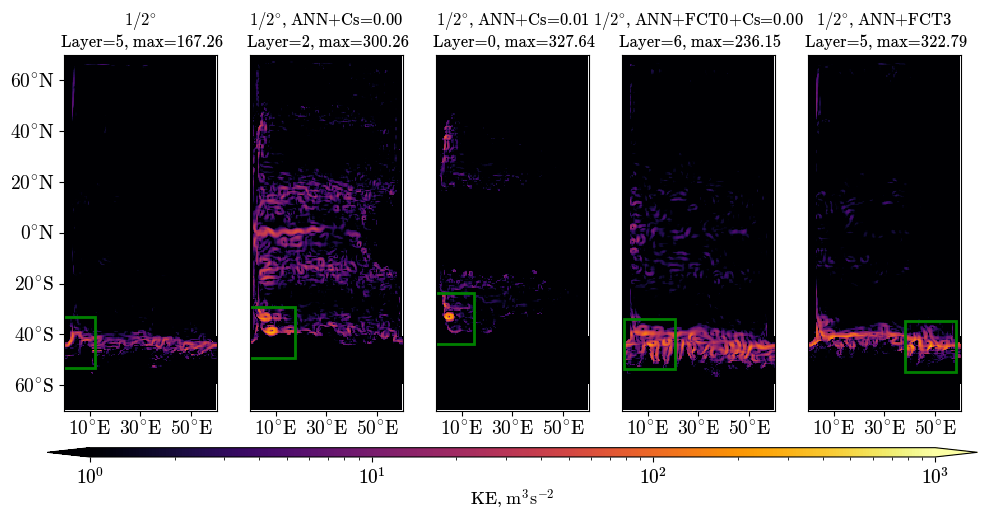

In [103]:
%time plot_max(-1)

CPU times: user 2.33 s, sys: 526 ms, total: 2.86 s
Wall time: 2.37 s


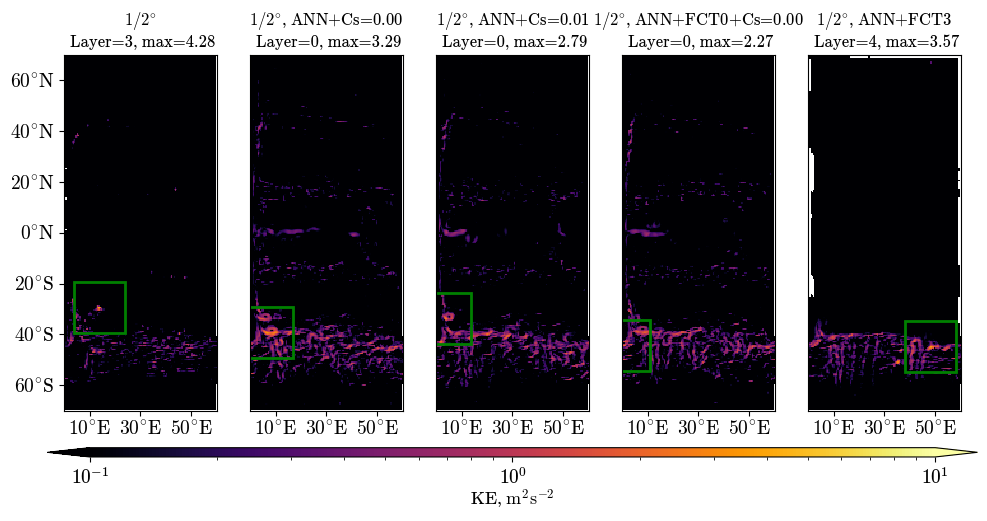

In [104]:
%time plot_max(-1,h=False)

CPU times: user 2.09 s, sys: 265 ms, total: 2.36 s
Wall time: 3.79 s


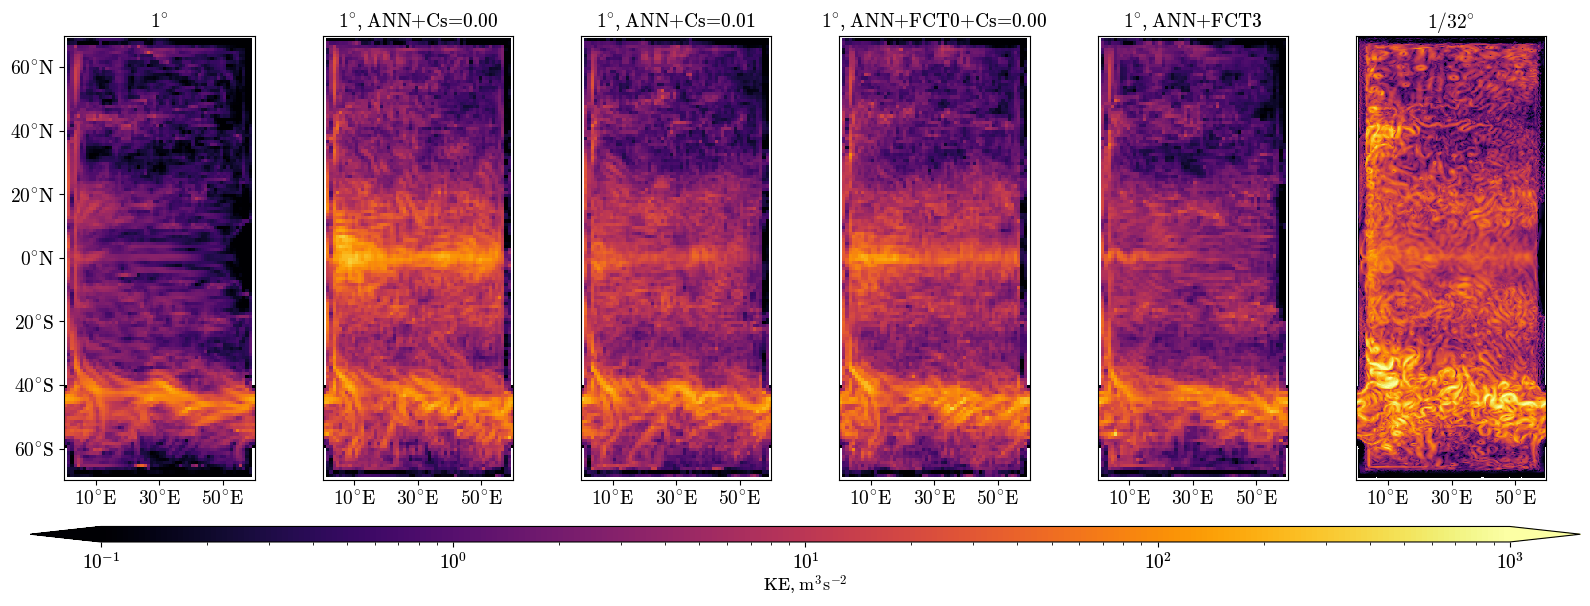

In [13]:
%time plot(-1,zl=slice(None,None))

In [106]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(lambda idx: plot_max(idx, True), list(np.arange(100,110))+list(np.arange(200,210)) + list(np.arange(500,510)) + list(np.arange(990,1000)), FPS=4, filename='May16_NW2_R2_max.mp4', dpi=150)

Native resolution of snapshots is used: 1480x772

Animation May16_NW2_R2_max.mp4 at FPS=4 will last for 10.0 seconds. The frames are saved to 
.ffmpeg/May16_NW2_R2_max

Running the command:
cd /scratch/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/offline_analysis; ffmpeg -y -framerate 4 -i .ffmpeg/May16_NW2_R2_max/frame-%d.png -s:v 1480x772 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p May16_NW2_R2_max.mp4


sh: 1: module: not found
ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --en

CPU times: user 2min 27s, sys: 45.4 s, total: 3min 12s
Wall time: 3min 6s


frame=   40 fps=0.0 q=-1.0 Lsize=    1986kB time=00:00:09.25 bitrate=1759.0kbits/s speed=11.3x    
video:1985kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.066026%
[libx264 @ 0x562aec080300] frame I:1     Avg QP: 6.92  size: 85655
[libx264 @ 0x562aec080300] frame P:10    Avg QP:12.05  size: 56221
[libx264 @ 0x562aec080300] frame B:29    Avg QP:14.08  size: 47723
[libx264 @ 0x562aec080300] consecutive B-frames:  2.5%  0.0%  7.5% 90.0%
[libx264 @ 0x562aec080300] mb I  I16..4: 69.8%  1.1% 29.1%
[libx264 @ 0x562aec080300] mb P  I16..4:  5.1%  2.5% 12.4%  P16..4:  6.8%  2.7%  2.1%  0.0%  0.0%    skip:68.5%
[libx264 @ 0x562aec080300] mb B  I16..4:  1.8%  0.9%  9.1%  B16..8: 11.2%  3.4%  2.0%  direct: 1.5%  skip:70.0%  L0:50.8% L1:43.1% BI: 6.1%
[libx264 @ 0x562aec080300] 8x8 transform intra:8.3% inter:8.0%
[libx264 @ 0x562aec080300] coded y,uvDC,uvAC intra: 60.5% 72.6% 71.9% inter: 6.5% 10.4% 10.2%
[libx264 @ 0x562aec080300] i16 v,h,dc,p: 79% 12%  8%  1%
[l